# WINE PRICE REGRESSIONS 🍷

<div>
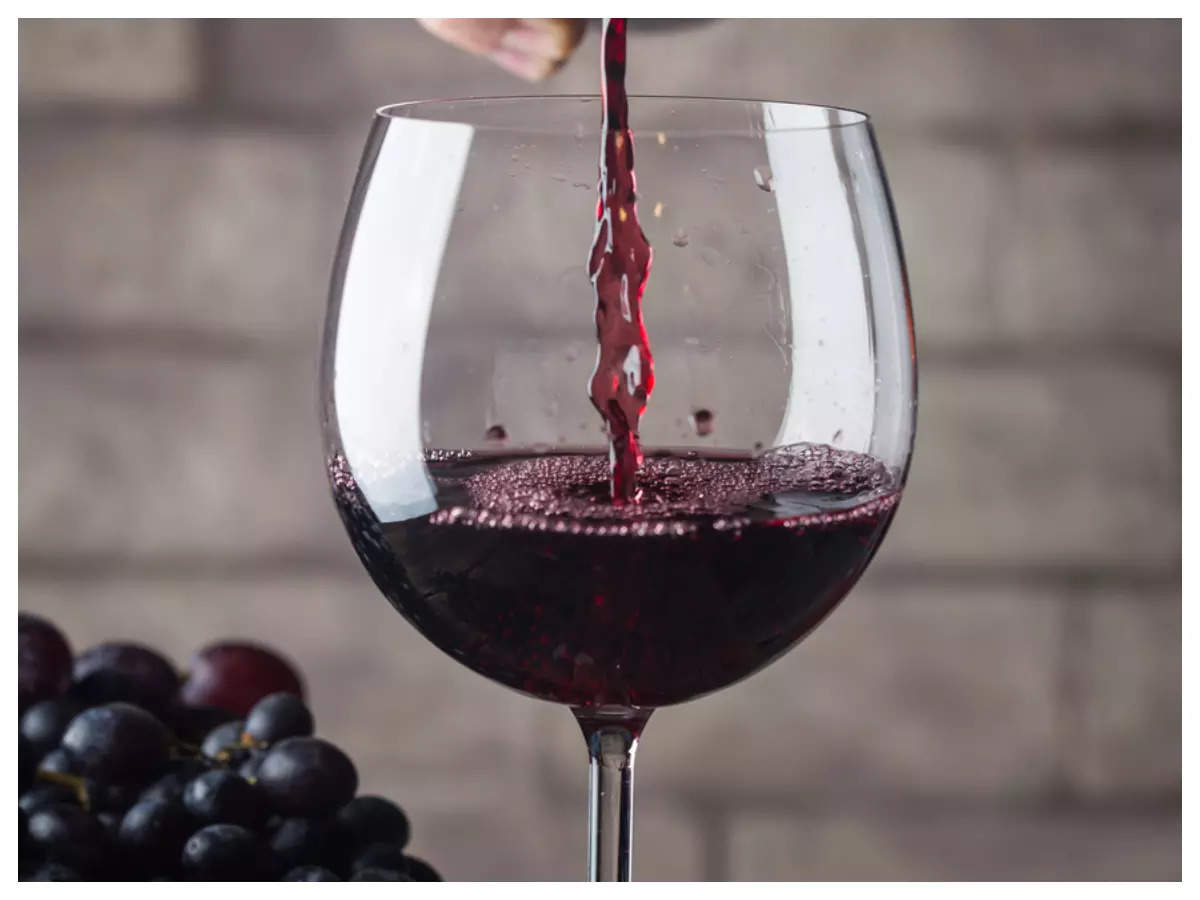
</div>

Kaggle example: https://www.kaggle.com/code/ayessa/wine-price-regression

 <b>1 - <span style='color:#FFB875;font-size:200%'>|</span> Introduction</b>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [31]:
df = pd.read_csv("wines_SPA.csv")
df.head(10)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
5,Vega Sicilia,Unico,1998,4.8,1209,Espana,Ribera del Duero,490.00,Ribera Del Duero Red,5.0,3.0
6,Vega Sicilia,Unico,2010,4.8,1201,Espana,Ribera del Duero,349.00,Ribera Del Duero Red,5.0,3.0
7,Vega Sicilia,Unico,1995,4.8,926,Espana,Ribera del Duero,810.89,Ribera Del Duero Red,5.0,3.0
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643,Espana,Ribera del Duero,345.00,Ribera Del Duero Red,5.0,3.0
9,Vega Sicilia,Unico,2011,4.8,630,Espana,Ribera del Duero,315.00,Ribera Del Duero Red,5.0,3.0


In [32]:
#size of dataset
df.shape

(7500, 11)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [34]:
#nulos
df.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [35]:
#Drop null values
df = df.dropna()

In [36]:
df.shape

(6329, 11)

In [37]:
df.describe()

,rating,num_reviews,price,body,acidity
count,6329.000000,6329.000000,6329.000000,6329.000000,6329.000000
mean,4.259425,442.292463,65.659082,4.158319,2.946753
std,0.124306,718.597235,162.599997,0.583345,0.247955
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,388.000000,19.980000,4.000000,3.000000
50%,4.200000,402.000000,29.150000,4.000000,3.000000
75%,4.200000,415.000000,60.950000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [38]:
df['year'].nunique()

71

In [39]:
df['year'].value_counts()

2011    1078
2016     810
2015     775
2018     752
2017     652
        ... 
1931       1
1910       1
1974       1
1992       1
1967       1
Name: year, Length: 71, dtype: int64

In [40]:
from collections import Counter
Counter(df["year"])

Counter({'2013': 58,
         '2018': 752,
         '2009': 39,
         '1999': 10,
         '1996': 11,
         '1998': 12,
         '2010': 68,
         '1995': 11,
         '2015': 775,
         '2011': 1078,
         '2016': 810,
         '1970': 5,
         '1946': 2,
         '1962': 2,
         '2019': 279,
         '2004': 231,
         'N.V.': 259,
         '1931': 1,
         '1979': 2,
         '2005': 182,
         '2020': 17,
         '2014': 338,
         '1985': 7,
         '1929': 1,
         '2007': 33,
         '2012': 480,
         '2017': 652,
         '2008': 28,
         '2006': 24,
         '2000': 17,
         '2003': 13,
         '2002': 12,
         '1991': 3,
         '1994': 12,
         '1990': 2,
         '1989': 6,
         '1987': 5,
         '1986': 6,
         '1981': 4,
         '2001': 21,
         '1968': 5,
         '1964': 6,
         '1982': 7,
         '1974': 1,
         '1983': 2,
         '1955': 2,
         '1980': 2,
         '1972': 1,
 

In [41]:
#droping N.V. year values
df = df.replace('N.V.',np.nan)
df = df.dropna()
df['year'] = df['year'].astype(np.int64)

In [42]:
df.shape

(6070, 11)

In [43]:
df = df.drop(columns="country")

In [44]:
df.shape

(6070, 10)